# Support Vector Machines

Las SVM se encuentran entre los mejores algoritmos de aprendizaje supervisado "listos para usar". La historia de SVM, empieza primero con la idea de los márgenes y  de separar datos con una "brecha" grande. A continuación, se habla del clasificador de margen óptimo, lo que nos lleva a una formulación sobre la dualidad de Lagrange. También veremos kernels, que brindan una forma de aplicar SVM de manera eficiente en dimensiones muy altas (infinitas) del espacio de características.

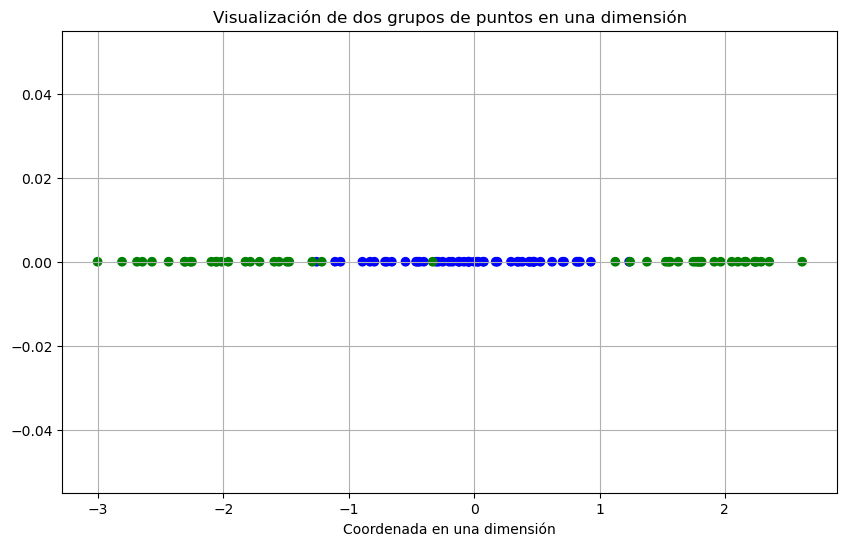

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar puntos para el grupo 1 en la parte central
group1 = np.random.normal(loc=0, scale=0.5, size=50)
# Generar puntos para el grupo 2 a los lados del grupo 1
group2 =np.hstack( (np.random.normal(loc=-2, scale=0.5, size=25), np.random.normal(loc=2, scale=0.5, size=25)))
# Concatenar los puntos de los dos grupos
points = np.concatenate([group1, group2])
# Etiquetas para los puntos
labels = np.concatenate([np.zeros(50), np.ones(50)])
# Colores para los puntos según sus etiquetas
colors = {0: 'blue', 1: 'green'}
# Visualización de los puntos en una sola dimensión
plt.figure(figsize=(10, 6))
plt.scatter(points, np.zeros_like(points), c=[colors[label] for label in labels], marker='o')
plt.title('Visualización de dos grupos de puntos en una dimensión')
plt.xlabel('Coordenada en una dimensión')

plt.grid(True)



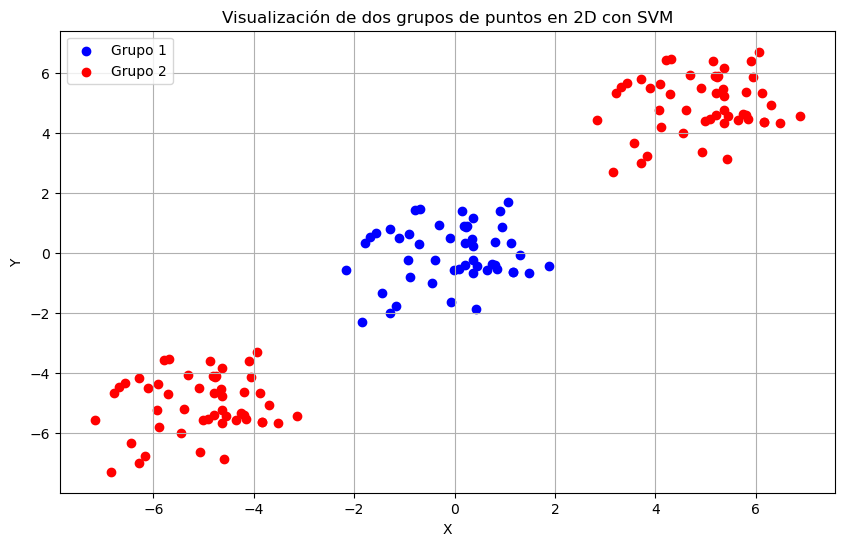

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generar puntos del grupo 1 en el centro
center_points = np.random.randn(50, 2)

# Generar puntos del grupo 2 a los lados
side_points1 = center_points + np.array([5, 5])
side_points2 = center_points + np.array([-5, -5])

# Combinar los puntos de ambos grupos
X = np.vstack([center_points, side_points1, side_points2])
y = np.hstack([np.zeros(50), np.ones(50), np.ones(50) * 2])
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.show()


### Experimento 1: let's try a linear kernel

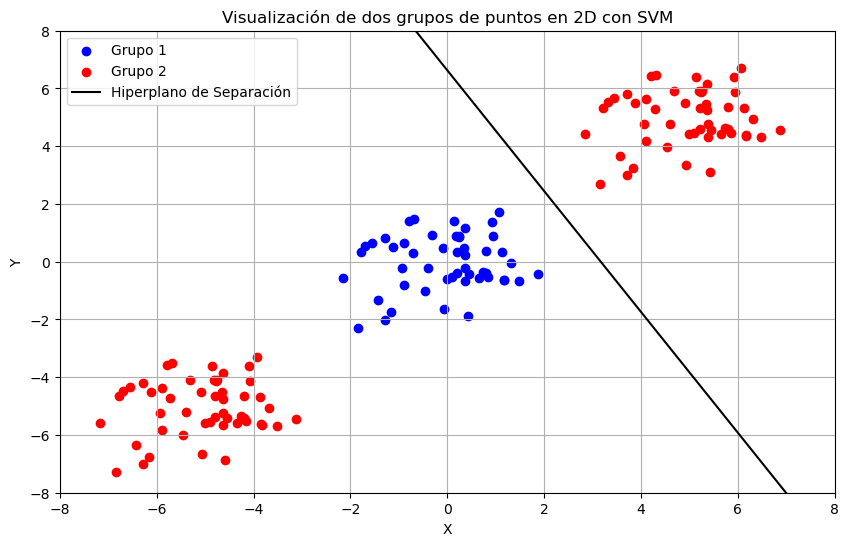

In [4]:
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Obtener el hiperplano de separación
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot del hiperplano de separación
plt.plot(xx, yy, 'k-', label='Hiperplano de Separación')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.axis([-8,8,-8,8])
plt.show()

### Ejercicio 1 (Gaussian kernel)

Considere dos muestras, $(x^i,y^i)$ y $(x^j,y^j)$, con vectores de entrada $x$ con $n$ atributos. El Gaussian kernel se define como:


$K(x^i,x^j)= exp\left(-\frac{|x^i-x^j|^2}{2\sigma^ 2}\right) = exp\left(-\frac{\sum_{k=1} ^ n (x^i _k-x^j _k)^2}{2\sigma^2}\right)$


El parametro $\sigma$ controla la velocidad de decaimiento cuando los  vectores $x^i$ y $x^j$ se apartan. Usualmente se usa la notación  $\gamma=\frac{1}{2\sigma^ 2}$.

Implemente una función que calcule el Gaussian Kernel, debe recibir dos vectores de atributos y un parámetro $\sigma$


Una vez que haya completado la función gaussianKernel, la siguiente celda probará la función de su kernel en dos ejemplos proporcionados y debería ver un valor de:

    1. 0.44485   if the input is one dimensional
    2. 0.286504  if the input is two dimensional

In [5]:
def gaussianKernel(x1,x2,sigma):
    K=0
    #your code here
   
    #
    return K
    

In [6]:
x1 = -2.1
x2 = -1.2
sigma = 1;
K = gaussianKernel(x1, x2, sigma)
print('one dimension:', K)

x1 = np.array([1, 1])
x2 = np.array([1.5, 2]) 
sigma = 1;
K = gaussianKernel(x1, x2, sigma)
print('two dimension:', K)

One dimension: 0.6669768108584743
Two dimensions: 0.5352614285189903


Explore cómo afecta el valor de $\sigma$ cuando hay puntos cerca o muy separados.

### Ejercicio 2

Comenzaremos con un conjunto de datos de ejemplo 2D que puede estar separado por un límite lineal. El script trazará los datos de entrenamiento. En este conjunto de datos, las posiciones de los ejemplos positivos (indicados con +) y los ejemplos negativos (indicados con o) sugieren una separación natural indicada por la brecha. Sin embargo, observe que hay un ejemplo negativo atípico o en el extremo izquierdo aproximadamente (0.1, 4.1). Como parte de este ejercicio, también verá cómo este valor atípico afecta el límite de decisión de SVM.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
########################################################################################
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


En esta parte del ejercicio, debe utilizar diferentes valores del parámetro $C$ con SVM. El parámetro $C$ es un valor positivo que controla la penalización para datos de entrenamiento mal clasificados. Un parámetro $C$ grande le indica al SVM que intente clasificar todos los ejemplos correctamente. $C$ juega un papel similar a $\frac{1}{\lambda}$, donde $\lambda$ es un parámetro de regularización.

La siguiente parte es ejecutar el entrenamiento SVM (con $C = 1$) usando el software SVM que he incluido con el código al inicio. Cuando $C = 1$, debería encontrar que SVM coloca el límite de decisión en el espacio entre los dos conjuntos de datos y clasifica erróneamente el punto de datos en el extremo izquierdo.

In [ ]:
########################################################################################
#cargar dataset1
data=np.loadtxt('dataset1.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'+r')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
#create classifiers
C = 100  # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label= 'Boundary')
plt.legend();


Su tarea es probar diferentes valores de $C$ en este conjunto de datos. Específicamente, debes cambiar el valor de $C$ en el script a $C = 100$ y ejecutar el entrenamiento SVM nuevamente. Cuando $C = 100$, debería encontrar que SVM ahora clasifica cada ejemplo correctamente, pero tiene un límite de decisión que no parece ser un ajuste natural para los datos. Argumente su respuesta

### Ejercicio 3

La siguiente parte cargará y trazará el conjunto de datos 2. En el gráfico, puede observar que no existe un límite de decisión lineal que separe los ejemplos positivos y negativos para este conjunto de datos. Sin embargo, al utilizar el núcleo gaussiano con SVM, podrá aprender un límite de decisión no lineal que puede funcionar razonablemente bien para el conjunto de datos. 

Debe cambiar el parámetro $\gamma$, está asociado al parámetro $\sigma$, de la primera ecuación. No debe utilizar valores superiores a 50.

¿Cuál es el efecto de cambiar el parámetro $\gamma$?

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 1  # parametro de regularizacion de la svm
gamma= 1 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)



### Ejercicio 4

En esta parte del ejercicio, obtendrá habilidades más prácticas sobre cómo utilizar una SVM con un núcleo gaussiano. La siguiente parte cargará y mostrará un tercer conjunto de datos. Utilizará SVM con el kernel gaussiano con este conjunto de datos.

En el conjunto de datos proporcionado, data3, se le proporcionan las variables X, y, X_test, y_test. El código proporcionado entrena al clasificador SVM utilizando el conjunto de entrenamiento (X, y) con algunos parámetros iniciales. Su tarea es utilizar el conjunto de validación cruzada X_test, y_test para determinar los mejores parámetros C y gamma a utilizar. Debe escribir cualquier código adicional necesario para ayudarle a buscar entre los parámetros C y gamma. Tanto para C como para gamma, se sugiere probar valores en pasos multiplicativos (p. ej., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Tenga en cuenta que debe probar todos los pares posibles de valores para C y gamma (por ejemplo, C = 0.3 y gamma = 0.1). Por ejemplo, si prueba cada uno de los 8 valores enumerados anteriormente para C
y para gamma, terminarías entrenando y evaluando (en el conjunto de validación cruzada) un total de 8 x 8 = 64 modelos diferentes.

**Nota:** Puede implementar GridSearch si así lo desea.

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


########################################################################################
#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt('dataset3_train.data',delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
data=np.loadtxt('dataset3_test.data',delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)

########################

##graficar datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')

########################################################################
C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])       
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
## su codigo va aqui #########



#por ejemplo para un par de valores, C = 0.01 y gamma = 0.001 se tiene que el clasificador no funciona bien, accuracy es incluso por debajo
#de 50%
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma[0], C=C[0])
#entrenar
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100
print(por)


  
#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)


plt.show()

